# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
# stundent details example: John S. 9812
#                       student details 1: rachel S. 1266
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

### AI agent name: ChatGPT

### Goal:
To understand machine learning concepts and get step-by-step guidance on implementing a supervised learning workflow using the Wine dataset.

### Prompt 1:
Explain the steps of a supervised learning workflow for classification problems.

### Prompt 2:
Provide example Python code to load and perform exploratory data analysis on the Wine dataset.

### Prompt 3:
Show how to run GridSearchCV with cross-validation for classification models, including KNN and Decision Tree.

---
In addition to using the AI assistant, I consulted official documentation for Python libraries such as Pandas and Scikit-learn to ensure accuracy and deepen my understanding.


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

### 1.C – Learning Problem and Dataset Explanation

<pre>
The Wine dataset includes results from chemical analysis of wines originating from three grape cultivars.
Each instance consists of 13 numerical features such as alcohol content, malic acid, and proline.
The objective is to predict the type of wine (class 0, 1, or 2) based on these features.
This task is a supervised classification problem, since the data contains both the input features and the correct class label for each sample.
The dataset is pre-divided into a training set and a test set, which will be used for training the model and evaluating its performance.
</pre>


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [10]:
import pandas as pd

train_df = pd.read_csv("C:/Users/rache/Desktop/שנה ב - סמסטר ב/למידת מכונה/מטלה 2/wine_train.csv")
test_df = pd.read_csv("C:/Users/rache/Desktop/שנה ב - סמסטר ב/למידת מכונה/מטלה 2/wine_test.csv")


In [12]:
print("Train Dataset:")
display(train_df.head())

print("Test Dataset:")
display(test_df.head())


Train Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


Test Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [14]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

print("\nTrain dataset info:")
train_df.info()

print("\nMissing values (train):")
print(train_df.isnull().sum())


Train dataset shape: (142, 14)
Test dataset shape: (36, 14)

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null

We begin by loading the Wine dataset into Pandas DataFrames.  
Then we check the number of rows and columns, the data types, and whether there are any missing values.


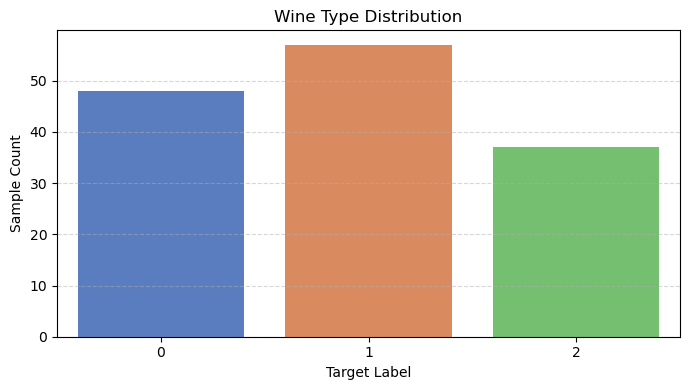

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(data=train_df, x='target', hue='target', palette='muted', legend=False)
plt.title('Wine Type Distribution')
plt.xlabel('Target Label')
plt.ylabel('Sample Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This chart displays how the target variable (wine class) is distributed in the training set.  
A relatively balanced distribution helps ensure the model doesn't favor one class over others.


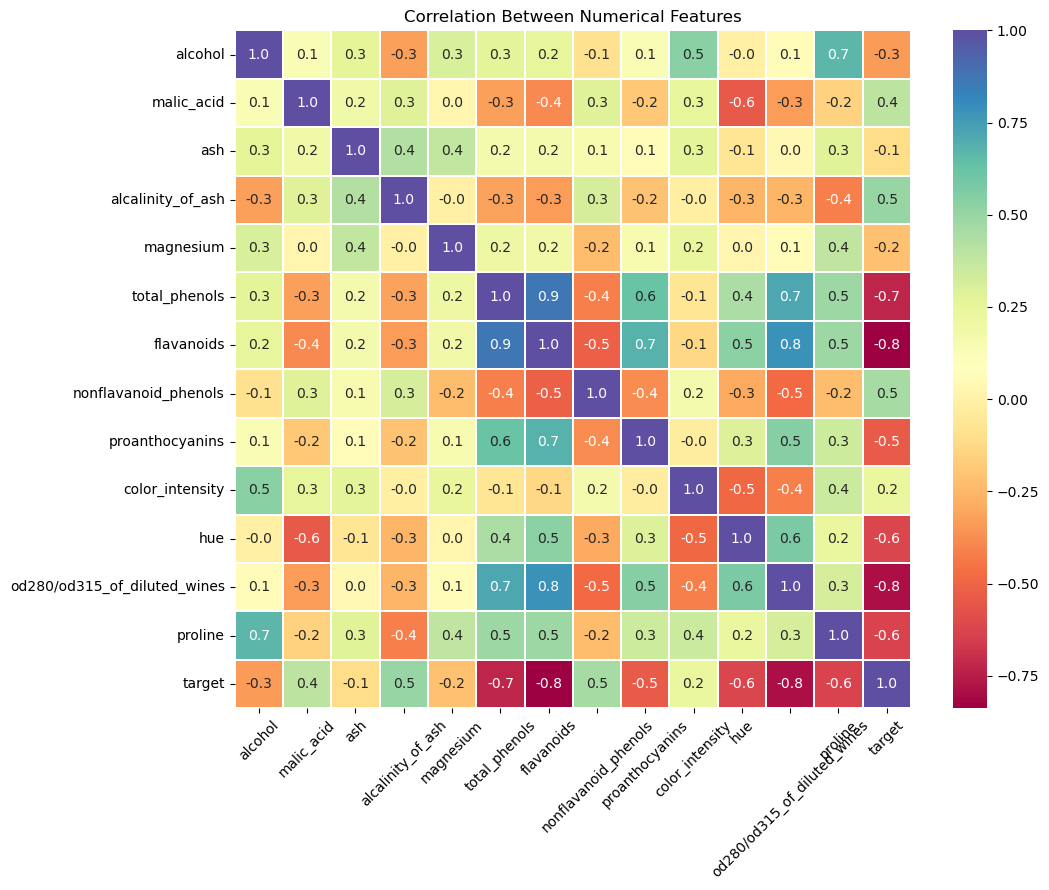

In [19]:
plt.figure(figsize=(11,9))
cor_mat = train_df.corr()

sns.heatmap(cor_mat, annot=True, cmap='Spectral', fmt=".1f", linewidths=0.3)
plt.title("Correlation Between Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This correlation heatmap shows the relationships between all numerical features.  
Features with high correlation may be redundant, while others can reveal useful patterns for prediction.


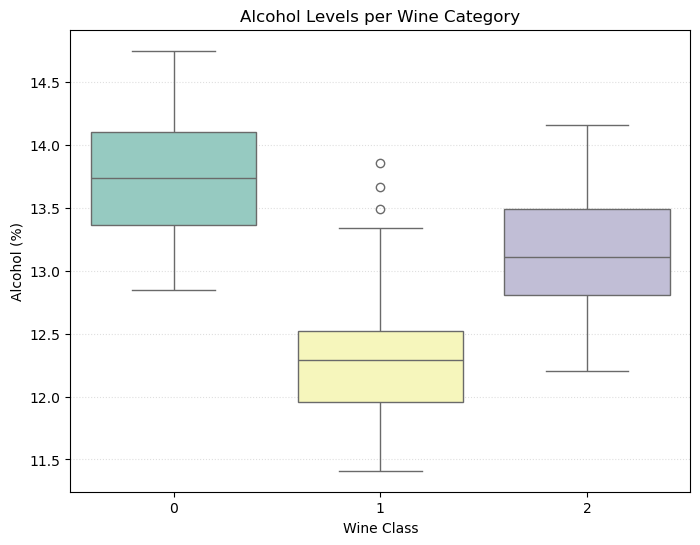

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='target', y='alcohol', hue='target', palette='Set3', legend=False)
plt.title('Alcohol Levels per Wine Category')
plt.xlabel('Wine Class')
plt.ylabel('Alcohol (%)')
plt.grid(True, axis='y', linestyle=':', alpha=0.4)
plt.show()


This boxplot illustrates the alcohol content distribution for each wine class.  
We can observe whether this feature helps distinguish between the classes based on the range and median.


## Part 3 - Experiments
You could add as many code cells as needed

In [24]:
### Separate features and target
X_features = train_df.drop('target', axis=1)
y_labels = train_df['target']

print(f"Feature matrix shape: {X_features.shape}")
print(f"Target vector shape: {y_labels.shape}")


Feature matrix shape: (142, 13)
Target vector shape: (142,)


We separate the input features (X) from the target labels (y),  
in preparation for model training and cross-validation.


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

macro_f1 = make_scorer(f1_score, average='macro')

model_configs = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    }
}


In [27]:
results = []

for model_name, config in model_configs.items():
    print(f"\nRunning GridSearchCV for {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=macro_f1,
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_features, y_labels)
    
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Best Score': round(grid_search.best_score_, 4)
    })



Running GridSearchCV for KNN...

Running GridSearchCV for DecisionTree...


In [28]:
import pandas as pd

summary_df = pd.DataFrame(results)
summary_df.sort_values(by='Best Score', ascending=False, inplace=True)
summary_df.reset_index(drop=True, inplace=True)

print("Grid Search Results:")
display(summary_df)


Grid Search Results:


,Model,Best Params,Best Score
0,DecisionTree,"{'criterion': 'entropy', 'max_depth': 5}",0.9458
1,KNN,"{'n_neighbors': 7, 'weights': 'uniform'}",0.6610


We ran GridSearchCV with 5-fold cross-validation on two models:  
K-Nearest Neighbors and Decision Tree.  
The evaluation metric was macro-average F1-score.  
The results table summarizes the best parameters and scores for each model.


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [31]:
from sklearn.tree import DecisionTreeClassifier

final_model = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
final_model.fit(X_features, y_labels)


DecisionTreeClassifier(max_depth=5, random_state=42)

We selected the Decision Tree model with max_depth=5 and criterion='gini',  
as it achieved the highest macro F1-score during cross-validation.  
This model is now trained on the entire training dataset and will be used for final predictions.


## Part 5 - Apply on test and show model performance estimation

In [34]:
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']


In [35]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = final_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Macro F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8889
Macro F1-score: 0.8930
Confusion Matrix:
[[10  1  0]
 [ 2 12  0]
 [ 0  1 10]]


We used the final model to predict labels on the test set.  
The evaluation includes accuracy, macro-averaged F1-score, and the confusion matrix.  
These results help us assess how well the model generalizes to new data.



### Part 6 – Summary & Conclusions

In this assignment, we explored the Wine dataset through a supervised learning workflow.  
We began with a visual analysis of the training data to better understand class distribution, feature relationships, and potential insights.  
Next, we trained and evaluated multiple classification models using GridSearchCV with cross-validation, optimizing for the macro-average F1-score.  
Among the models tested, the Decision Tree classifier with a max depth of 5 and "gini" criterion achieved the best performance.  
Finally, we tested the selected model on an unseen test set and reported its accuracy and F1-score.  
This process demonstrated the importance of proper model selection, evaluation, and interpretation in building effective machine learning solutions.
